Ієрархічна кластерізація

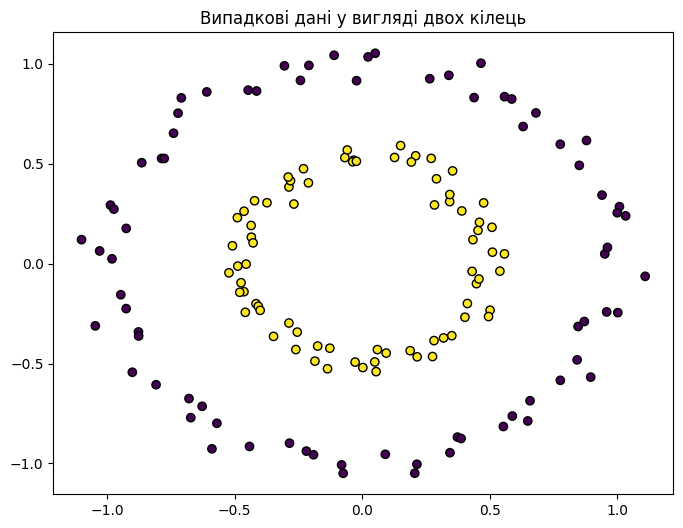

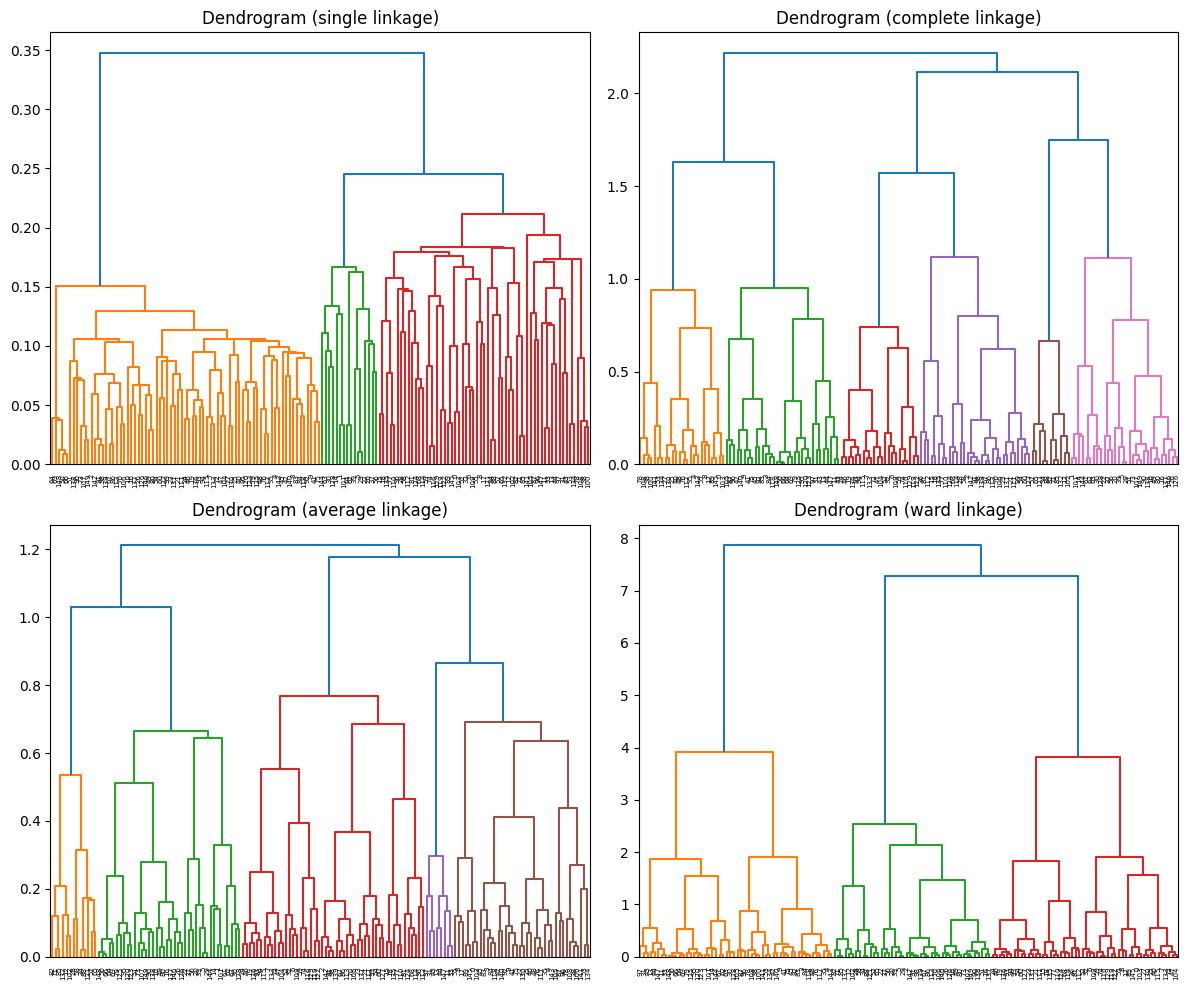

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from scipy.cluster.hierarchy import dendrogram, linkage

# Генерування випадкових даних у формі двох кілець
X, y = make_circles(n_samples=150, factor=0.5, noise=0.05, random_state=42)

# Візуалізація сгенерованих даних
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Випадкові дані у вигляді двох кілець')
plt.show()

# Виконання ієрархічної кластерізації з різними параметрами linkage
linkage_types = ['single', 'complete', 'average', 'ward']
linkage_results = {}

for link_type in linkage_types:
    # Розрахунок ієрархічної кластерізації
    linked = linkage(X, method=link_type)
    linkage_results[link_type] = linked

# Візуалізація дендограм для різних типів linkage
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for idx, link_type in enumerate(linkage_types):
    dendrogram(linkage_results[link_type], ax=axes[idx])
    axes[idx].set_title(f'Dendrogram ({link_type} linkage)')

plt.tight_layout()
plt.show()


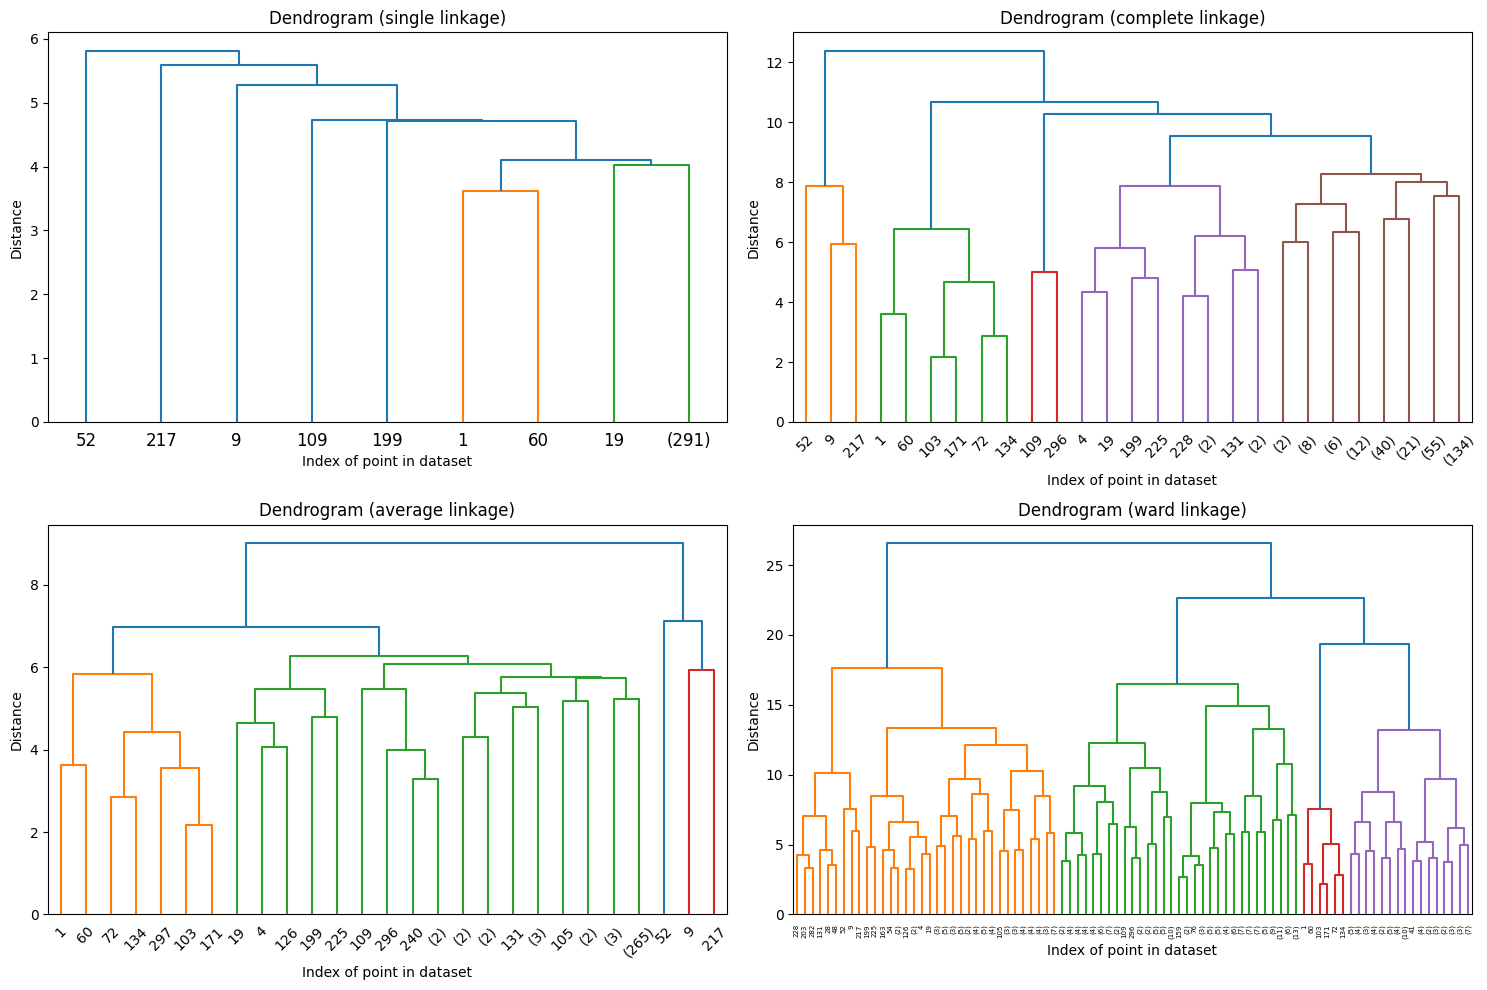

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Завантаження датасету з локального файлу
file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)

# Підготовка даних: нормалізація датасету
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Визначення різних типів зв'язку для ієрархічної кластерізації
linkage_types = ['single', 'complete', 'average', 'ward']

# Створення дендограми для кожного типу зв'язку
plt.figure(figsize=(15, 10))
for i, linkage_type in enumerate(linkage_types, 1):
    plt.subplot(2, 2, i)
    linked = linkage(data_scaled, method=linkage_type)
    dendrogram(linked, truncate_mode='level', p=6) # Обмеження дендограми рівнем 6
    plt.title(f'Dendrogram ({linkage_type} linkage)')
    plt.xlabel('Index of point in dataset')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Завантаження та нормалізація даних
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Кластеризація методом DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(data_scaled)

# Розрахунок результатів
unique_labels = np.unique(clusters)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(clusters).count(-1)
percentage_noise = n_noise / len(data) * 100

print("Кількість кластерів:", n_clusters)
print("Відсоток некластеризованих спостережень:", percentage_noise)
print("Мітки кластерів:", clusters)


print("\nПараметри DBSCAN:")
print("eps - максимальна відстань між двома точками для одного кластера:", dbscan.eps)
print("min_samples - мінімальна кількість точок в околиці для формування кластера:", dbscan.min_samples)
print("metric - метрика для виміру відстані між точками:", dbscan.metric)
print("algorithm - алгоритм, використаний для обчислення найближчих сусідів:", dbscan.algorithm)



Кількість кластерів: 0
Відсоток некластеризованих спостережень: 100.0
Мітки кластерів: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]

П

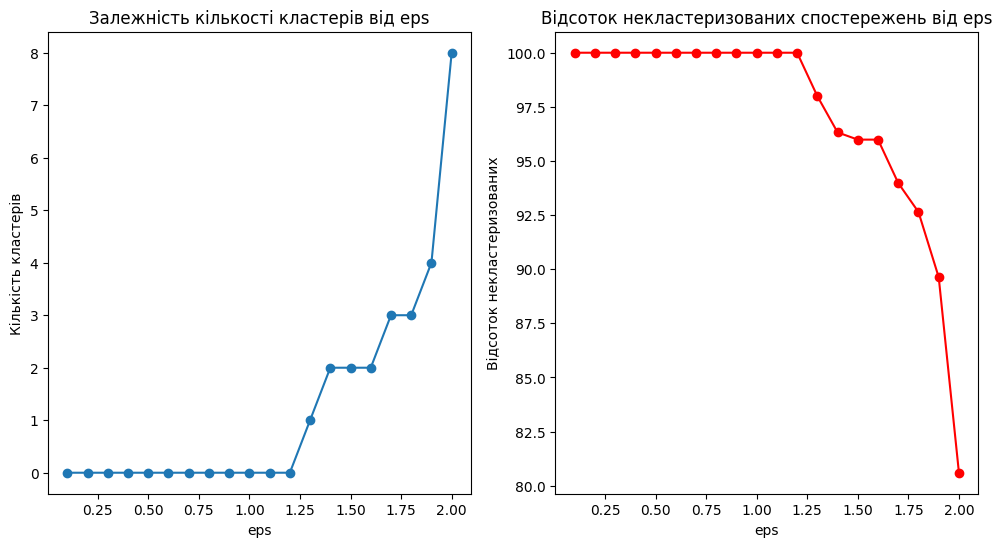

In [ ]:
# Побудова графіку залежностей від eps
eps_values = np.linspace(0.1, 2.0, 20)
n_clusters_eps = []
percent_noise_eps = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(data_scaled)
    unique_labels = np.unique(labels)
    n_clusters_eps.append(len(unique_labels) - (1 if -1 in unique_labels else 0))
    percent_noise_eps.append(100 * list(labels).count(-1) / len(labels))

# Візуалізація
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(eps_values, n_clusters_eps, marker='o')
plt.title('Залежність кількості кластерів від eps')
plt.xlabel('eps')
plt.ylabel('Кількість кластерів')

plt.subplot(1, 2, 2)
plt.plot(eps_values, percent_noise_eps, marker='o', color='red')
plt.title('Відсоток некластеризованих спостережень від eps')
plt.xlabel('eps')
plt.ylabel('Відсоток некластеризованих')
plt.show()


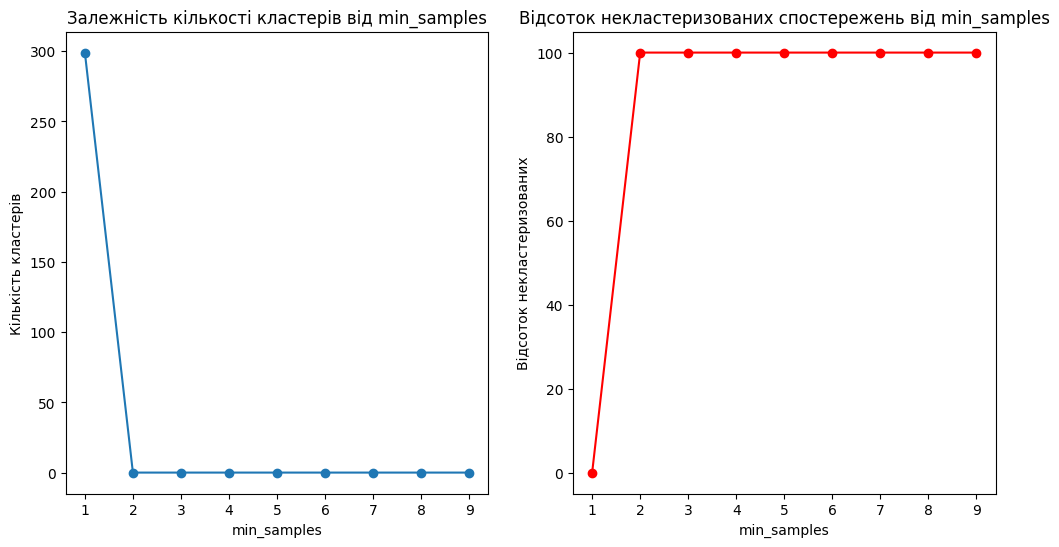

In [ ]:
# Подібний код для min_samples, встановлюючи eps за замовчуванням (0.5)
min_samples_values = range(1, 10)
n_clusters_samples = []
percent_noise_samples = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(min_samples=min_samples)
    labels = dbscan.fit_predict(data_scaled)
    unique_labels = np.unique(labels)
    n_clusters_samples.append(len(unique_labels) - (1 if -1 in unique_labels else 0))
    percent_noise_samples.append(100 * list(labels).count(-1) / len(labels))

# Візуалізація
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(min_samples_values, n_clusters_samples, marker='o')
plt.title('Залежність кількості кластерів від min_samples')
plt.xlabel('min_samples')
plt.ylabel('Кількість кластерів')

plt.subplot(1, 2, 2)
plt.plot(min_samples_values, percent_noise_samples, marker='o', color='red')
plt.title('Відсоток некластеризованих спостережень від min_samples')
plt.xlabel('min_samples')
plt.ylabel('Відсоток некластеризованих')
plt.show()


In [ ]:
 # Діапазони для параметрів
eps_range = np.linspace(0.1, 3.0, 30)  # Розширений діапазон для детальнішого пошуку
min_samples_range = range(2, 10)  # Мінімальна кількість точок у сусідстві

# Підготовка для зберігання результатів
results = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        percent_noise = np.sum(labels == -1) / len(labels) * 100

        # Зберігання результатів, які відповідають критеріям
        if 5 <= n_clusters <= 7 and percent_noise <= 12:
            results.append((eps, min_samples, n_clusters, percent_noise))

# Виведення результатів, які відповідають критеріям
for result in results:
    print(f"eps: {result[0]:.2f}, min_samples: {result[1]}, "
          f"Кількість кластерів: {result[2]}, Відсоток шуму: {result[3]:.2f}%")

eps: 3.00, min_samples: 2, Кількість кластерів: 5, Відсоток шуму: 7.02%


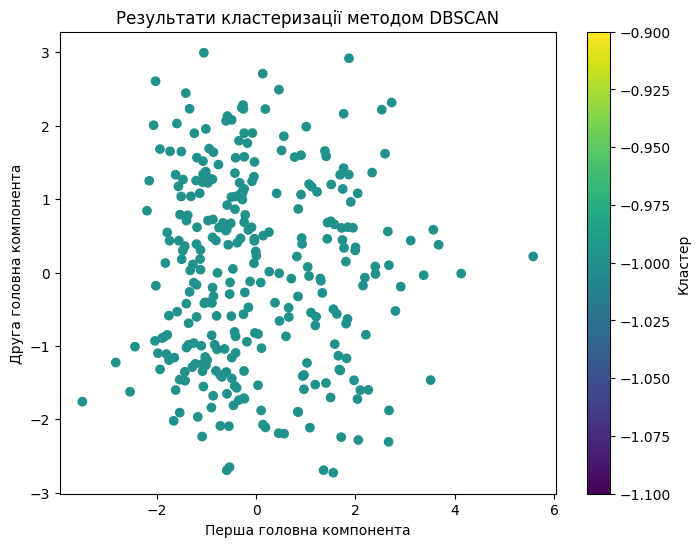

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Завантаження та нормалізація даних
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Кластеризація методом DBSCAN зі значеннями за замовчуванням
dbscan = DBSCAN()
labels = dbscan.fit_predict(data_scaled)

# Зменшення розмірності до 2 за допомогою PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# Візуалізація результатів кластеризації
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', marker='o')
plt.colorbar(label='Кластер')
plt.title('Результати кластеризації методом DBSCAN')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.show()


OPTICS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:598: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
/usr/local/lib/

Оптимальні параметри для OPTICS: (2.1999999999999997, 8)
Кількість унікальних міток OPTICS: 2
Кількість унікальних міток DBSCAN: 4


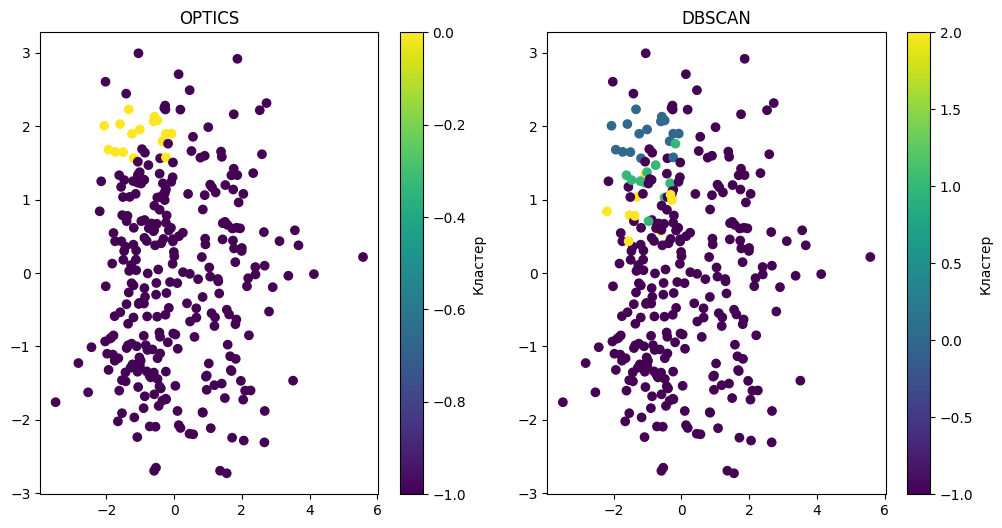

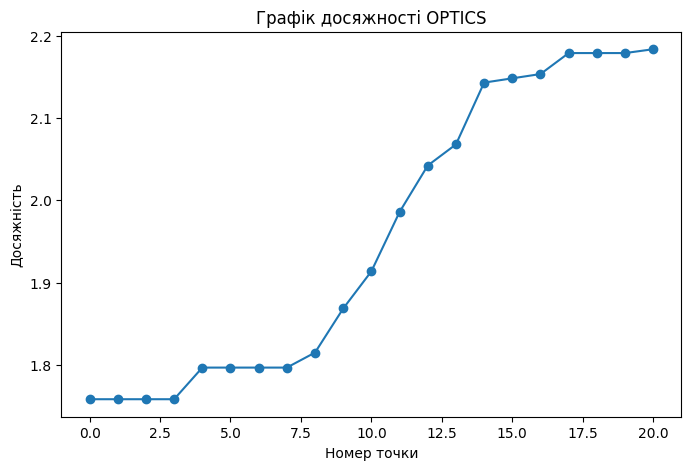

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Завантаження та нормалізація даних
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Пошук оптимальних параметрів для OPTICS
best_silhouette_score = -1
optimal_params = None

max_eps_range = np.linspace(0.1, 3.0, 30)
min_samples_range = range(2, 10)

for max_eps in max_eps_range:
    for min_samples in min_samples_range:
        optics = OPTICS(max_eps=max_eps, min_samples=min_samples)
        labels_optics = optics.fit_predict(data_scaled)
        unique_labels_optics = np.unique(labels_optics)
        if len(unique_labels_optics) > 1:
            silhouette_score_value = silhouette_score(data_scaled, labels_optics)
            if silhouette_score_value > best_silhouette_score:
                best_silhouette_score = silhouette_score_value
                optimal_params = (max_eps, min_samples)

# Вивід оптимальних параметрів
print("Оптимальні параметри для OPTICS:", optimal_params)

# Використання оптимальних параметрів для кластеризації методом OPTICS
optics = OPTICS(max_eps=optimal_params[0], min_samples=optimal_params[1])
labels_optics = optics.fit_predict(data_scaled)

# Кількість унікальних міток, повернутих OPTICS
unique_labels_optics = np.unique(labels_optics)
print("Кількість унікальних міток OPTICS:", len(unique_labels_optics))

# Використання оптимальних параметрів для кластеризації методом DBSCAN
dbscan = DBSCAN(eps=optimal_params[0], min_samples=optimal_params[1])
labels_dbscan = dbscan.fit_predict(data_scaled)

# Кількість унікальних міток, повернутих DBSCAN
unique_labels_dbscan = np.unique(labels_dbscan)
print("Кількість унікальних міток DBSCAN:", len(unique_labels_dbscan))

# Зменшення розмірності до 2 за допомогою PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# Візуалізація результатів кластеризації OPTICS та DBSCAN
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optics, cmap='viridis', marker='o')
plt.colorbar(label='Кластер')
plt.title('OPTICS')

plt.subplot(1, 2, 2)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
plt.colorbar(label='Кластер')
plt.title('DBSCAN')

# Побудова графіка досяжності OPTICS
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(optics.reachability_)), np.sort(optics.reachability_), marker='o')
plt.xlabel('Номер точки')
plt.ylabel('Досяжність')
plt.title('Графік досяжності OPTICS')

plt.show()



Метрика: euclidean, Кількість унікальних міток OPTICS: 7


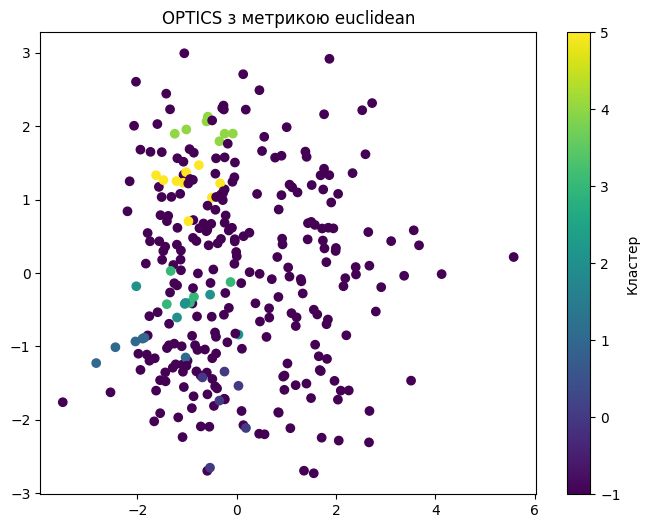

Метрика: manhattan, Кількість унікальних міток OPTICS: 6


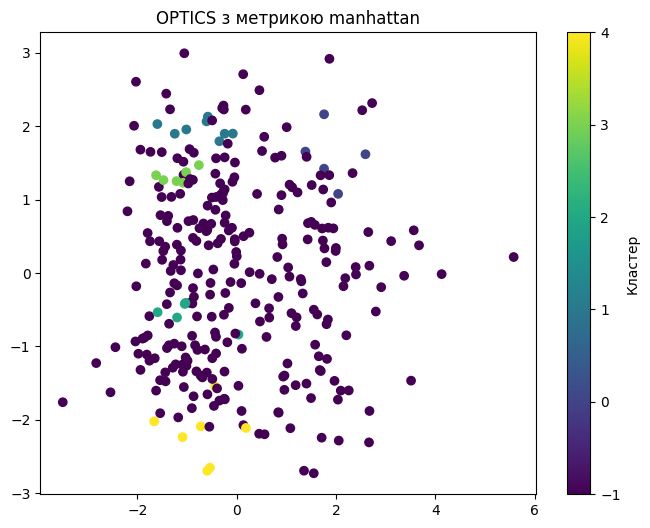

Метрика: cosine, Кількість унікальних міток OPTICS: 15


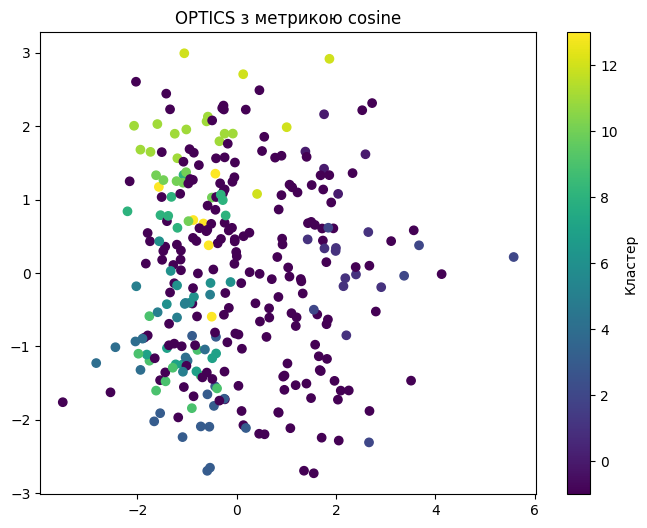

Метрика: correlation, Кількість унікальних міток OPTICS: 13


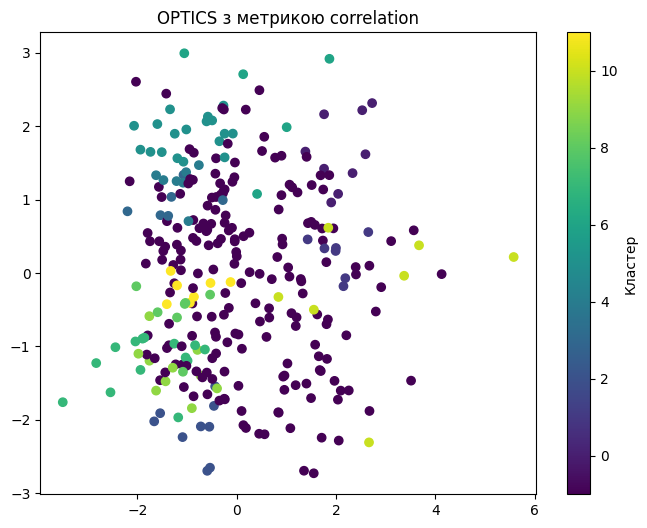

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Завантаження та нормалізація даних
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Визначення різних метрик
metrics = ['euclidean', 'manhattan', 'cosine', 'correlation']

# Дослідження роботи методу OPTICS з використанням різних метрик
for metric in metrics:
    # Кластеризація методом OPTICS
    optics = OPTICS(metric=metric)
    labels_optics = optics.fit_predict(data_scaled)

    # Кількість унікальних міток
    unique_labels_optics = np.unique(labels_optics)
    print(f"Метрика: {metric}, Кількість унікальних міток OPTICS: {len(unique_labels_optics)}")

    # Зменшення розмірності до 2 за допомогою PCA для візуалізації
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data_scaled)

    # Візуалізація результатів кластеризації
    plt.figure(figsize=(8, 6))
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optics, cmap='viridis', marker='o')
    plt.colorbar(label='Кластер')
    plt.title(f'OPTICS з метрикою {metric}')
    plt.show()
